In [590]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**About Dataset**
- age: Age of the patient in years
- sex: Gender of the patient (0: female, 1: male)
- cp: Type of chest pain (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)
- trtbps: Resting blood pressure in mmHg
- chol: Serum cholesterol in mg/dl
- fbs: Fasting blood sugar level categorized as above 120 mg/dl (0: false, 1: true)
- restecg: Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy)
- thalachh: Maximum heart rate achieved during a stress test exng: Exercise induced angina (0: no, 1: yes)
- oldpeak: ST depression induced by exercise relative to rest (unit -> depression)
- slp: Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)
- caa: Number of major vessels (0-4) colored by fluoroscopy thall: Thalium stress test result (0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described)
- output: Heart disease status (0: no disease, 1: presence of disease)

In [591]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [592]:
print(heart_disease.variables) 

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [593]:
import pandas as pd
df = pd.DataFrame(X, columns=heart_disease.feature_names)

In [594]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


# Data cleaning and Processing

In [595]:
print(df.to_string())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal
0     63    1   1       145   233    1        2      150      0      2.3      3  0.0   6.0
1     67    1   4       160   286    0        2      108      1      1.5      2  3.0   3.0
2     67    1   4       120   229    0        2      129      1      2.6      2  2.0   7.0
3     37    1   3       130   250    0        0      187      0      3.5      3  0.0   3.0
4     41    0   2       130   204    0        2      172      0      1.4      1  0.0   3.0
5     56    1   2       120   236    0        0      178      0      0.8      1  0.0   3.0
6     62    0   4       140   268    0        2      160      0      3.6      3  2.0   3.0
7     57    0   4       120   354    0        0      163      1      0.6      1  0.0   3.0
8     63    1   4       130   254    0        2      147      0      1.4      2  1.0   7.0
9     53    1   4       140   203    1        2      155      1      3.1      3  0.0   7.0

In [596]:
df.duplicated().unique()

array([False])

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [598]:
df["targets"]=y

In [599]:
df["targets"].value_counts()

targets
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [600]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  targets   303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [602]:
import numpy as np
df["targets"]=np.where(df["targets"] > 0, 1, 0)

In [603]:
df['targets'].value_counts()

targets
0    164
1    139
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'targets'}>, <Axes: >, <Axes: >]],
      dtype=object)

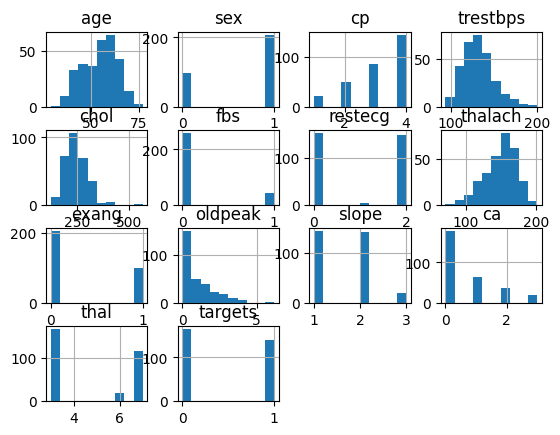

In [604]:
df.hist(bins=10) #Find Outliers

- Age: Most patients are aged between 40-60 years.
- Sex: More males than females are in the dataset.
- Chest Pain Type: Non-anginal pain is most common, followed by asymptomatic.
- Resting Blood Pressure: Commonly around 130-150 mmHg.
- Cholesterol: Concentrated around 230-260 mg/dl.
- Fasting Blood Sugar: Nearly equal distribution above and below 120 mg/dl.
- Resting ECG: Majority show normal or ST-T wave abnormalities.
- Maximum Heart Rate: Mostly around 130-170 bpm.
- Exercise Induced Angina: Majority do not experience it.
- Oldpeak: Varied values, commonly around 0.5 to 3.2.
- Slope of ST Segment: Even distribution across upsloping, flat, and downsloping.
- Number of Major Vessels: Mostly 0 or 1 vessel colored by fluoroscopy.
- Thallium Stress Test: Results vary, with no specific pattern.
- Heart Disease Status: Nearly even split between presence and absence of heart disease.

In [605]:
df.isnull().sum() #finding null Value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
targets     0
dtype: int64

In [606]:
df["ca"].unique() #Check Null Values

array([ 0.,  3.,  2.,  1., nan])

In [607]:
df["ca"].value_counts() #count nulll Values

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [608]:
df= df[df['ca'] < 4] #filter the rows
df = df[df['thal'] > 0]

In [609]:
df["thal"].unique()

array([6., 3., 7.])

In [610]:
#df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [611]:
df.drop_duplicates(inplace=True) #Drop the duplicate value if present

In [612]:
df.isnull().sum() #Again Checjk the Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
targets     0
dtype: int64

In [613]:
df.duplicated().sum()

0

# Rename the Veriables or Columns

In [614]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

# Univariate

In [615]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'targets'],
      dtype='object')

Text(10.74489660493827, 0.5, 'Count')

<Figure size 500x300 with 0 Axes>

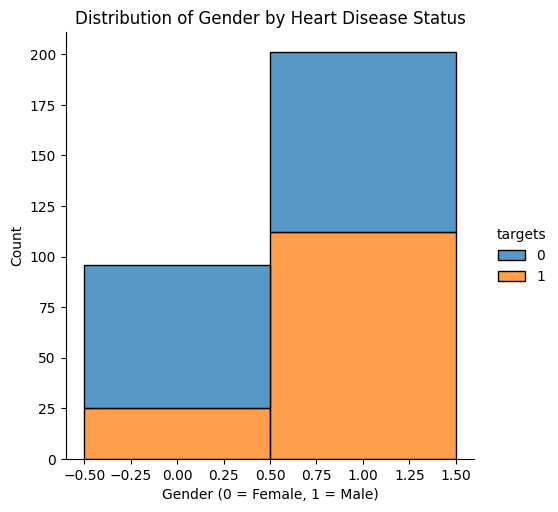

In [616]:
plt.figure(figsize=(5, 3))
sns.displot(df, x='sex', hue='targets', multiple='stack', color="green", discrete=True)
plt.title('Distribution of Gender by Heart Disease Status')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')


 **Insight:** The Displot visualizes the distribution of gender (sex) across different heart disease statuses (targets). It shows the count of females and males, with color coding to distinguish between those with and without heart disease.From the Displot it is clear that female has less number of heat disease as compare to male.

C:\Users\Ratne\AppData\Local\Temp\ipykernel_29692\1046604560.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['age'] , kde=True, palette='muted')


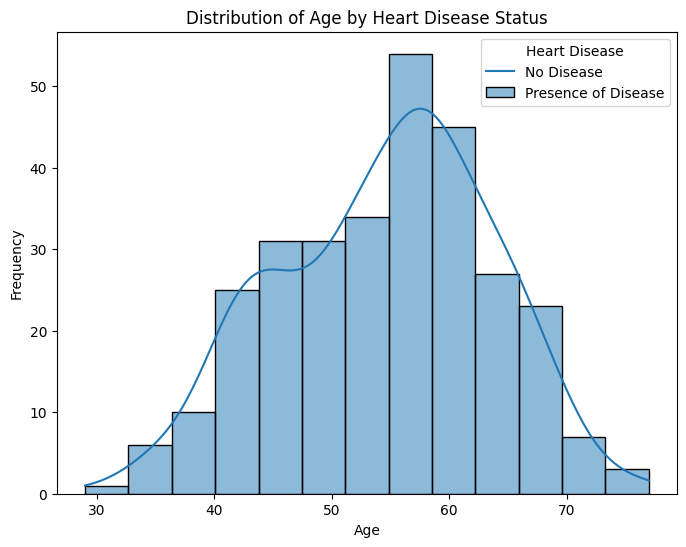

In [617]:
# Plotting the distribution of ages with respect to the presence or absence of heart disease
plt.figure(figsize=(8, 6))
sns.histplot(df['age'] , kde=True, palette='muted')
plt.title('Distribution of Age by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No Disease', 'Presence of Disease'])


- **mode>median>mean**
- **Insight**:The plot helps identify age groups more frequently associated with heart disease and provides insights into how age influences the likelihood of having heart disease. 

Text(0, 0.5, 'Count')

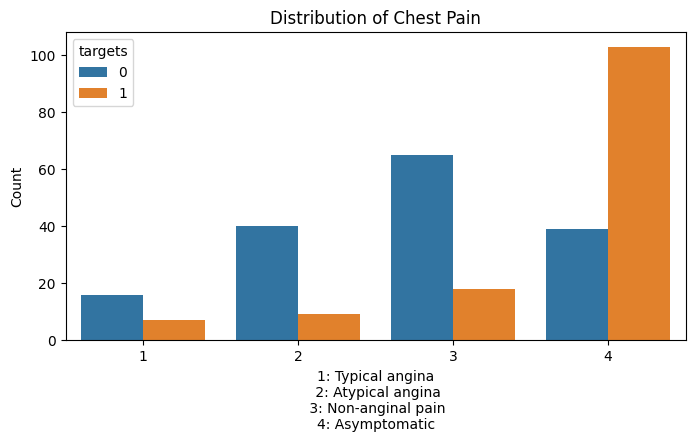

In [618]:
plt.figure(figsize=(8, 4))#the 'num_major_vessels' values are distributed across the dataset, providing insights into the frequency of each category.
sns.countplot(x='chest_pain_type',hue='targets', data=df)
plt.title('Distribution of Chest Pain')
plt.xlabel("1: Typical angina\n 2: Atypical angina\n 3: Non-anginal pain\n4: Asymptomatic")
plt.ylabel('Count')

**Insight:** The count plot displays the distribution of different chest pain types (chest_pain_type) and how they relate to heart disease status (targets). It shows the count of each chest pain type, with different colors indicating the presence or absence of heart disease. This visualization reveals which types of chest pain are more commonly associated with heart disease, providing insights into the correlation between chest pain characteristics and disease prevalence.

Text(0, 0.5, 'Count')

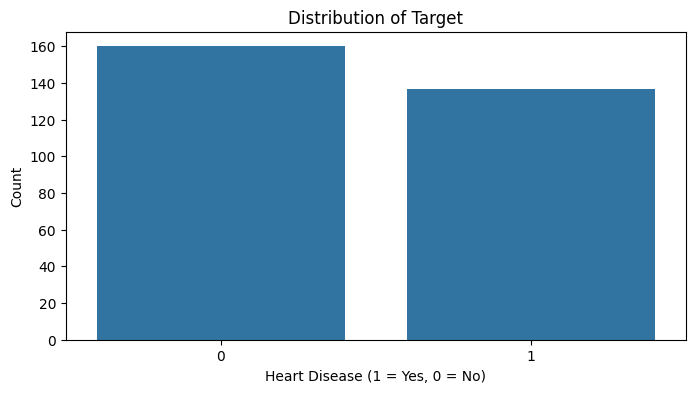

In [619]:
plt.figure(figsize=(8, 4))#plot for the 'targets' column, showing the distribution of heart disease cases
sns.countplot(x='targets', data=df)
plt.title('Distribution of Target')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')

 **Insight:** The count plot displays the distribution of the targets column, indicating the presence (1) or absence (0) of heart disease. Each bar represents the count of cases for each status. Count of patience having Heart disease is lesser as comparet to total count

# Bivariate

Text(0, 0.5, 'Age')

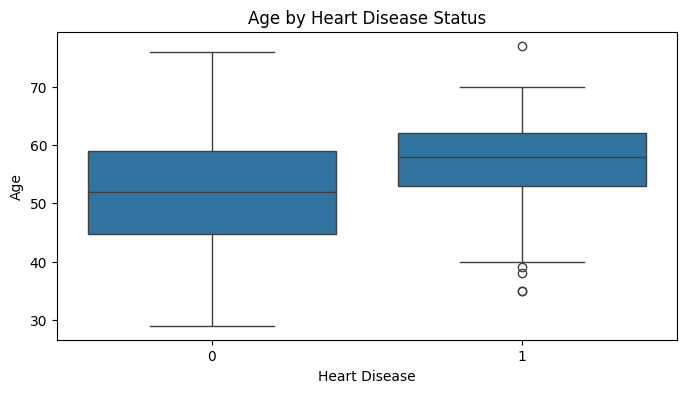

In [620]:
plt.figure(figsize=(8, 4))# box plot displaying the distribution of age across different heart disease statuses (0 or 1).
sns.boxplot(x='targets', y='age', data=df)
plt.title('Age by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Age')

 **Insight:** Each box represents the range of ages for patients with and without heart disease, with the central line indicating the median age. This visualization reveals how age varies between those with and without heart disease, highlighting potential differences in age distributions.From the graph it is clear that pepoles having age group between 55 to 62 have more number of heart disease.

Text(0, 0.5, 'serum cholestoral in mg/dl')

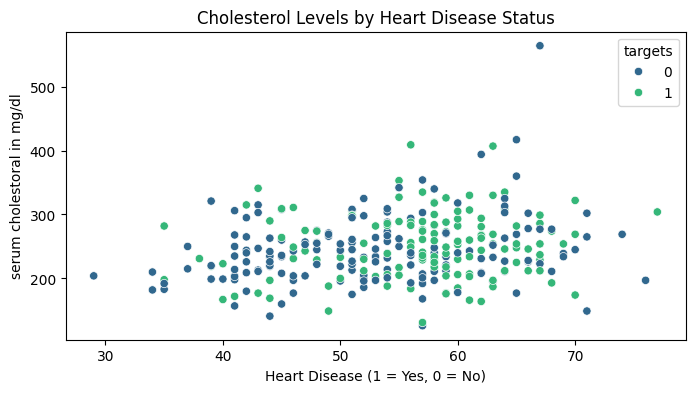

In [621]:
plt.figure(figsize=(8, 4)) #box plot showing the distribution of cholesterol levels for different heart disease statuses (0 or 1).
sns.scatterplot(x='age', y='cholesterol',hue='targets', data=df, palette='viridis')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('serum cholestoral in mg/dl')

 **Insight:** Each point represents an individual patient, showing how cholesterol levels vary with age for those with and without heart disease. This plot helps identify trends or clusters in cholesterol levels and age related to heart disease presence.Normal cholesterol level of human is lies between 200 to 238.from the graph it is clear that as the age inceases cholesterol level increases and with incease with increase in cholesterol chances of heart disease is increasing.

Text(0, 0.5, 'Resting Blood Pressure (mmHg)')

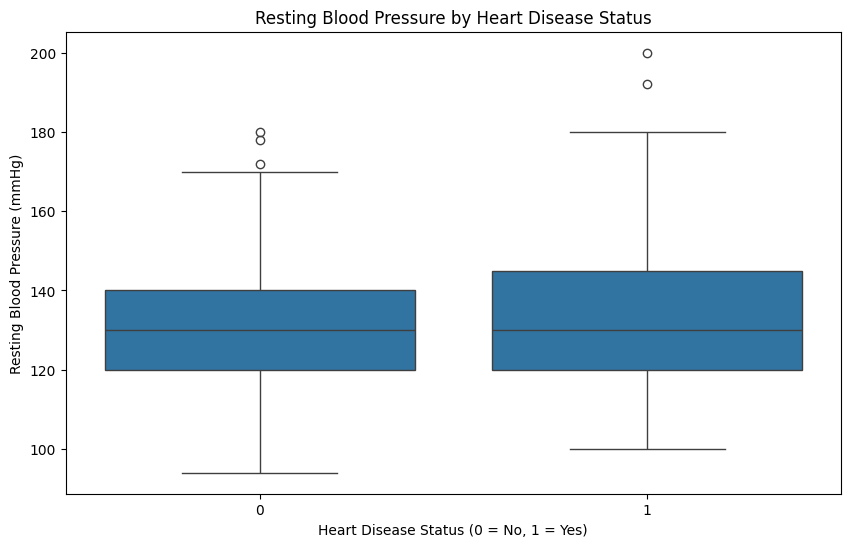

In [628]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='targets', y='resting_blood_pressure', data=df)
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease Status (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mmHg)')


 **Insight:** It shows the median, quartiles, and potential outliers in blood pressure readings, indicating how blood pressure varies between the two groups.

# Multivariate

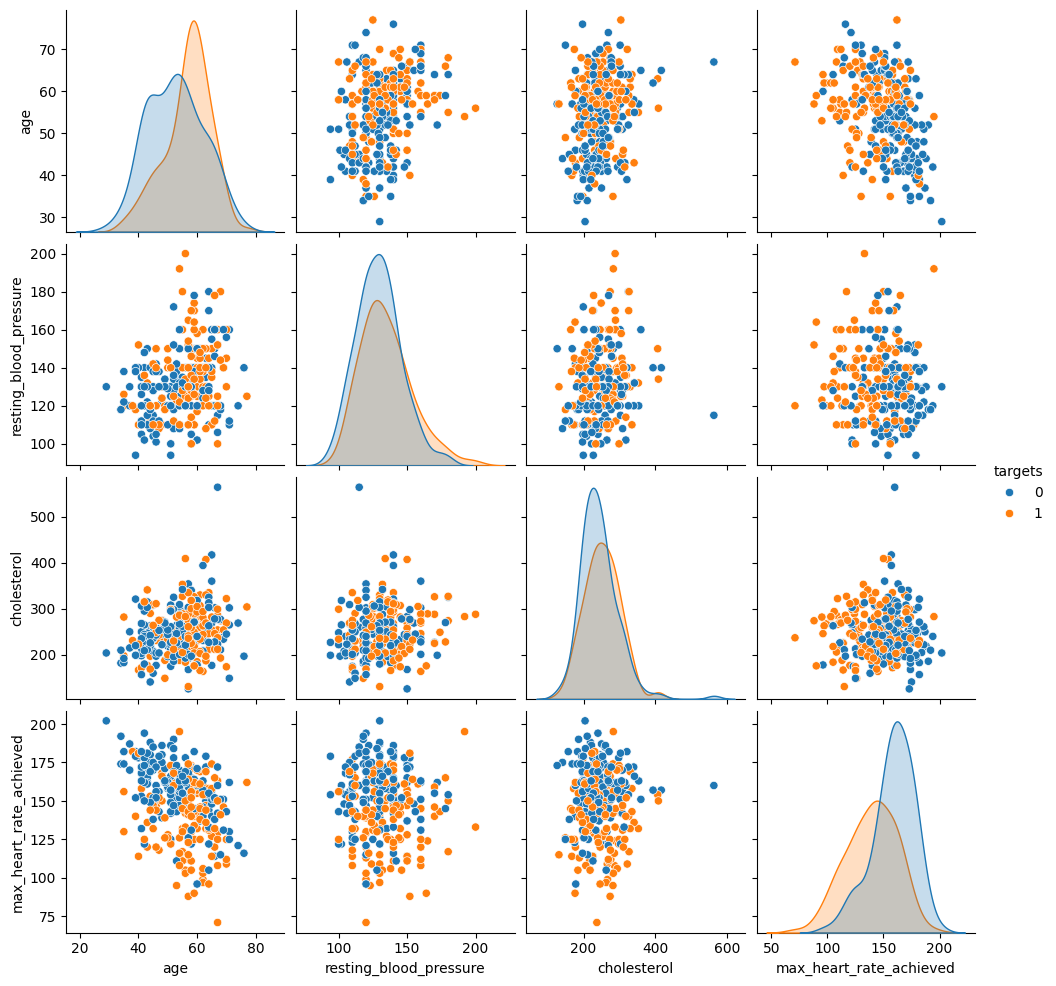

In [623]:
subset = df[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'targets']]
sns.pairplot(subset, hue='targets', diag_kind='kde')# It shows scatter plots for each pair of variables and KDE plots on the diagonals, colored by 'targets'.

 **Insight:** Visualize relationships and distributions of features with respect to heart disease. 
1. **Pairwise Relationships:**
- Age vs. Resting Blood Pressure: Reveals if age is related to blood pressure levels and how this relationship varies with heart disease status.
- Age vs. Cholesterol: Shows if age is associated with cholesterol levels and differences in cholesterol levels between those with and without heart disease.
- Age vs. Max Heart Rate: Highlights how age correlates with maximum heart rate achieved and the effect of heart disease status on this relationship.
- Resting Blood Pressure vs. Cholesterol: Indicates if there is a relationship between blood pressure and cholesterol levels and how it differs by heart disease status.
- Resting Blood Pressure vs. Max Heart Rate: Examines the correlation between blood pressure and maximum heart rate achieved.
- Cholesterol vs. Max Heart Rate: Shows how cholesterol levels relate to maximum heart rate and variations based on heart disease presence.
2. **Distributions:**
- Age Distribution: Shows how age distributions differ for patients with and without heart disease.
- Resting Blood Pressure Distribution: Highlights how blood pressure levels are distributed among the two groups.
- Cholesterol Distribution: Provides insights into cholesterol level distributions and their correlation with heart disease.
- Max Heart Rate Distribution: Reveals differences in maximum heart rate distributions for patients with and without heart disease.


Text(0.5, 1.0, 'Correlation Matrix')

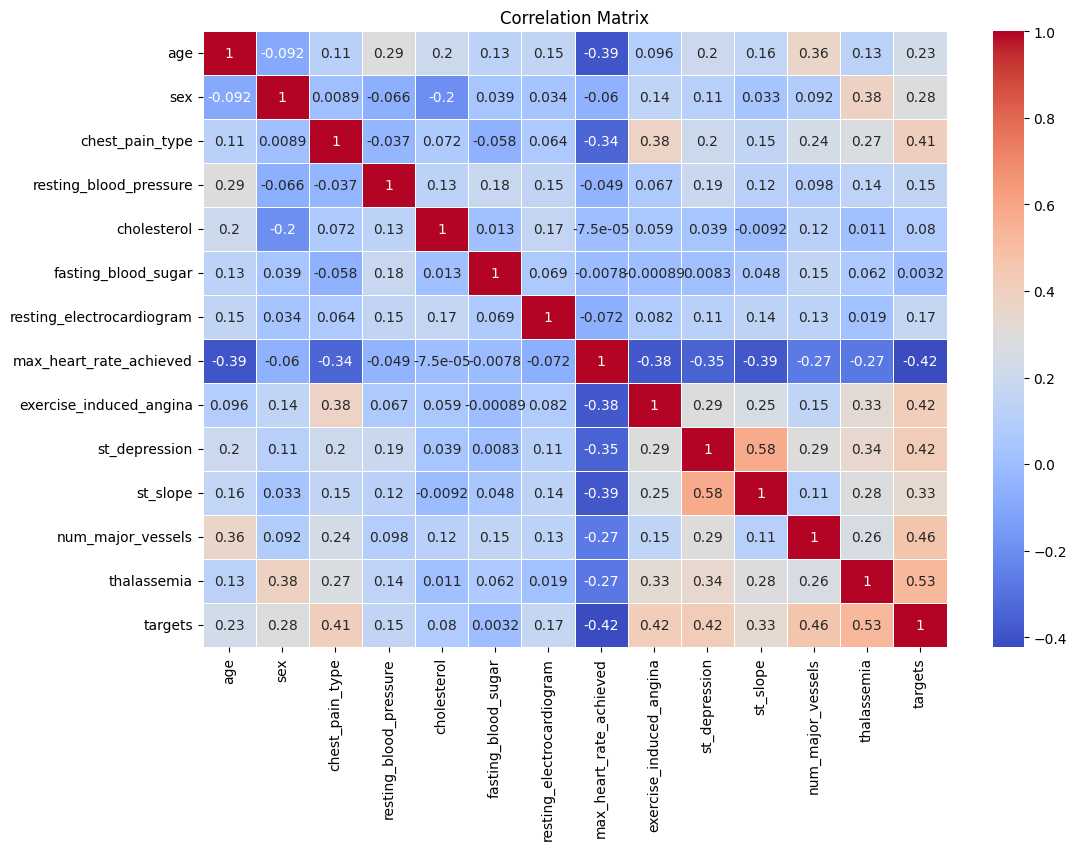

In [631]:
# heatmap of the correlation matrix for the DataFrame df, displaying the correlations between variables with annotations 
# a 'coolwarm' color map.
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True, linewidths=0.5)
plt.title('Correlation Matrix')

 **Insight:** The correlation matrix reveals significant positive correlations between age and certain features like thalachh (maximum heart rate) and oldpeak (ST depression). Cholesterol levels (chol) and fasting blood sugar (fbs) show a weaker correlation with the presence of heart disease (output). The number of major vessels colored by fluoroscopy (caa) is strongly correlated with heart disease presence. The dataset generally shows varied but not strongly definitive relationships among most variables, indicating a multifactorial nature of heart disease.

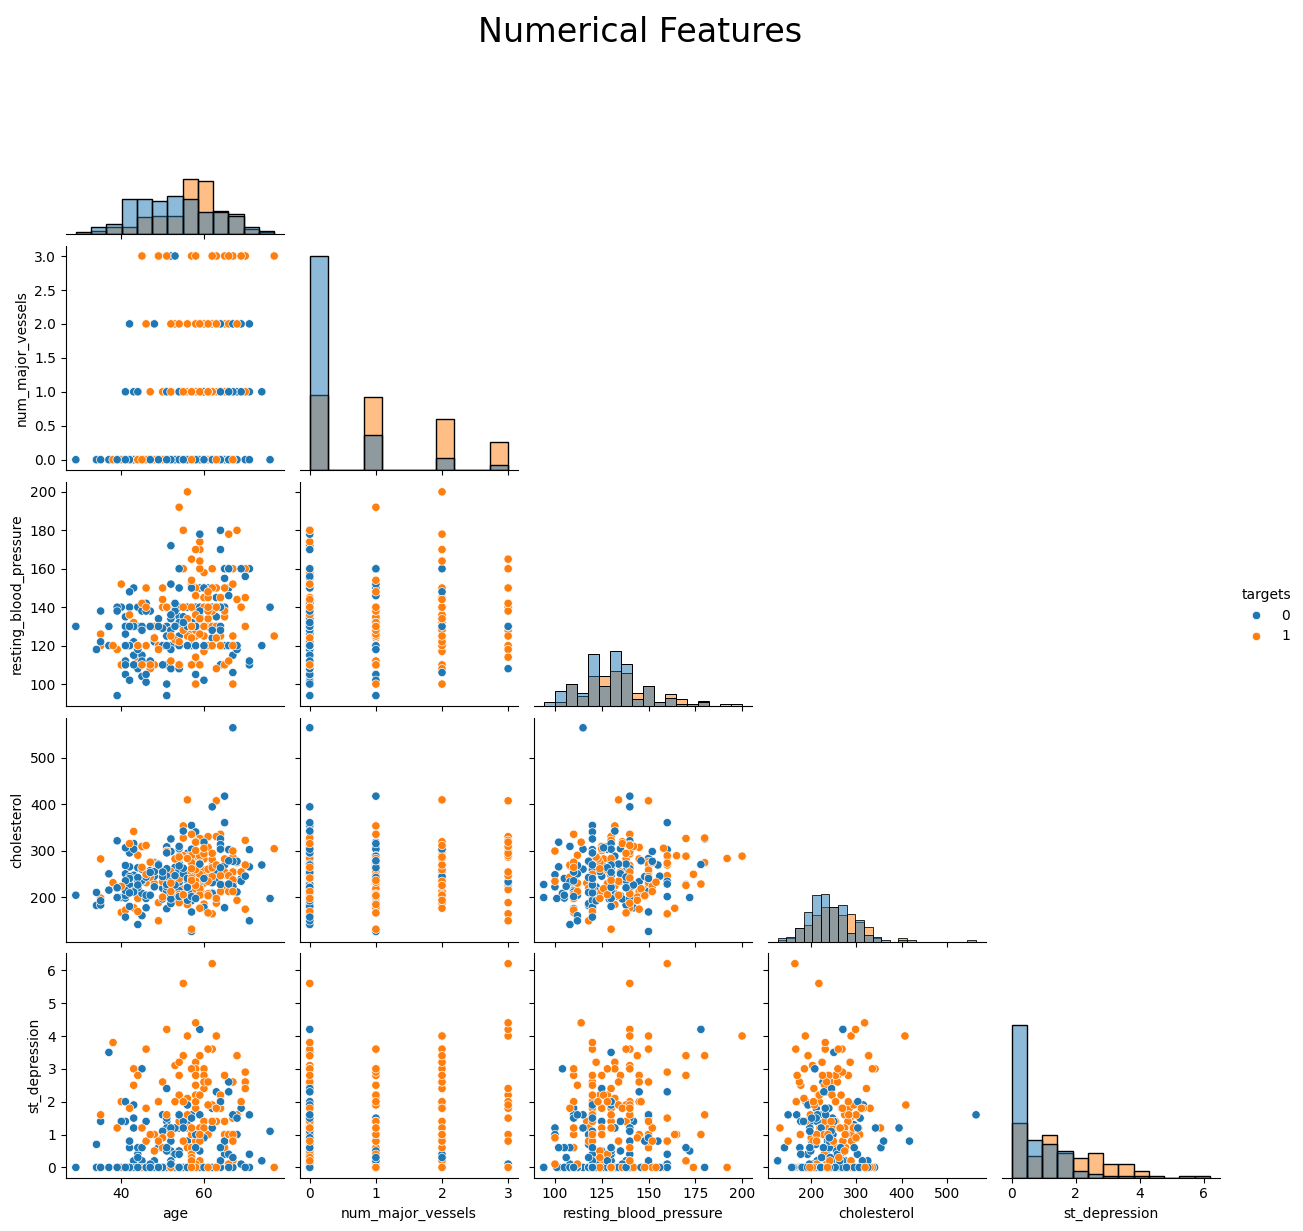

In [625]:
_ = ['age', 'num_major_vessels', 'resting_blood_pressure', 'cholesterol', 'st_depression', 'targets']
df = df[_]
g = sns.pairplot(df, hue="targets", corner=True, diag_kind='hist');
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
plt.suptitle('Numerical Features ' ,fontsize = 24);
# creates a pair plot for the selected numerical features in df, with the 'targets' column used for coloring. It uses histograms on the diagonals,
# omits the upper triangle of plots, and applies a cubehelix color palette.

 **Insight:** The pairplot effectively visualizes relationships between multiple numerical features and heart disease status. By examining the scatter plots and histograms, you can gain insights into how features like age, resting blood pressure, cholesterol, and ST depression correlate with heart disease and each other. This helps in identifying potential patterns and correlations that are crucial for understanding and diagnosing heart disease.